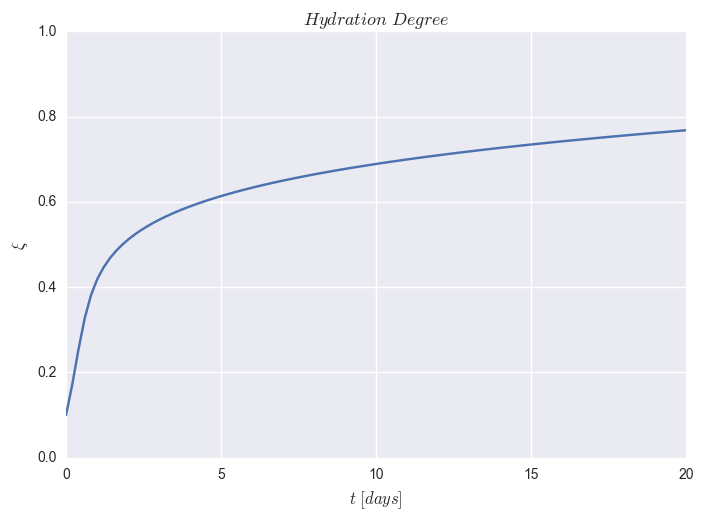

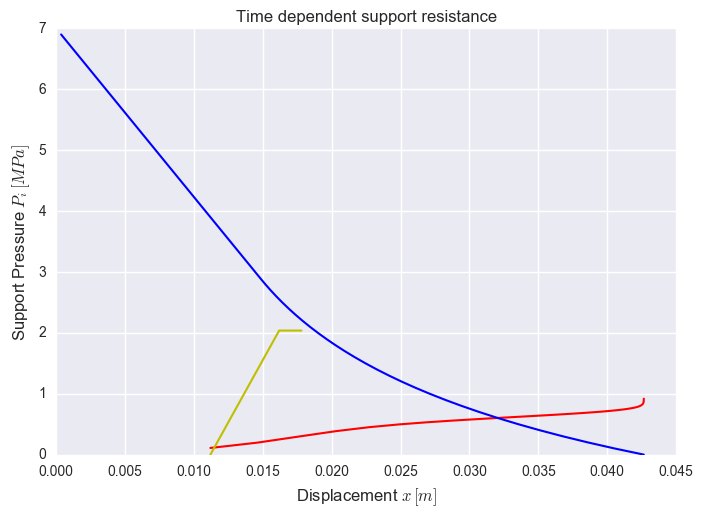

In [1]:
# -*- coding: utf-8 -*-
"""
@author: Onur Koc
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import integrate
import Rock_Support_Curve_V3 as rs
import Arrhenius as arr
from mpldatacursor import datacursor #optional to annotate any clicked point
#get_ipython().magic('matplotlib qt')
# Needed for ipython to draw in a seperate window

# ------------
# Input values
# ------------

rate = 3
# Advance rate [m/day]

# -------------------------------------------------------
# The strength of the concrete (time+dependent behavior)
# -------------------------------------------------------

s1d = 24 * 60 * 60
# One day in seconds

t1y = 365 * s1d
# One year in seconds

t1w = 20 * s1d
# One year in seconds

t = np.linspace(0.0, t1w, 100)
# Time from zero to 672h (20 days)

p_scmax = arr.fc_t * rs.t_c / rs.r_o
# The maximum sprayed concrete pressure [MPa]

x = rs.dis_sup + rate * t / s1d
# Distance from tunnel face (a time-dependent array) [m]

u_ix = rs.u_im*(1-(1-rs.u_if/rs.u_im)*np.exp(-3*x/(2*rs.r_pm)))
# Vlachopoulos

# ------------------
# Plotting utilities
# ------------------

plt.figure(num=1, dpi=125, edgecolor='w')
fig = plt.gcf()
fig.canvas.set_window_title('Support Resistance')
plt.plot(u_ix, p_scmax, 'r-', lw=1.5)
plt.plot(rs.x, rs.p_i/1000, 'b-', lw=1.5)
plt.plot(rs.point_x, rs.point_y, 'y-', lw=1.5)
plt.title('Time dependent support resistance')
plt.ylabel('Support Pressure $P_i\,[MPa]$', fontsize=12)
plt.xlabel('Displacement $x\,[m]$', fontsize=12)
datacursor(display='multiple', draggable=True)

plt.show()